In [5]:
import pandas as pd
import numpy as np
import os

# Load the dataset
# Use the current working directory instead of __file__ for Jupyter or interactive environments
current_dir = os.getcwd()  # Gets the current working directory in Jupyter
data_path = os.path.join(current_dir, '..', 'data', 'youtube.csv')

# Load the CSV file
df = pd.read_csv(data_path)

# Display the first few rows to check
df.head()

,CommentId,VideoId,Text,IsToxic,IsAbusive,IsThreat,IsProvocative,IsObscene,IsHatespeech,IsRacist,IsNationalist,IsSexist,IsHomophobic,IsReligiousHate,IsRadicalism
0,Ugg2KwwX0V8-aXgCoAEC,04kJtp6pVXI,If only people would just take a step back and...,False,False,False,False,False,False,False,False,False,False,False,False
1,Ugg2s5AzSPioEXgCoAEC,04kJtp6pVXI,Law enforcement is not trained to shoot to app...,True,True,False,False,False,False,False,False,False,False,False,False
2,Ugg3dWTOxryFfHgCoAEC,04kJtp6pVXI,\nDont you reckon them 'black lives matter' ba...,True,True,False,False,True,False,False,False,False,False,False,False
3,Ugg7Gd006w1MPngCoAEC,04kJtp6pVXI,There are a very large number of people who do...,False,False,False,False,False,False,False,False,False,False,False,False
4,Ugg8FfTbbNF8IngCoAEC,04kJtp6pVXI,"The Arab dude is absolutely right, he should h...",False,False,False,False,False,False,False,False,False,False,False,False


In [6]:
print(df.isnull().sum())
print(df.describe())
print(df.dtypes)
print(df.shape)

CommentId          0
VideoId            0
Text               0
IsToxic            0
IsAbusive          0
IsThreat           0
IsProvocative      0
IsObscene          0
IsHatespeech       0
IsRacist           0
IsNationalist      0
IsSexist           0
IsHomophobic       0
IsReligiousHate    0
IsRadicalism       0
dtype: int64
                   CommentId      VideoId           Text IsToxic IsAbusive  \
count                   1000         1000           1000    1000      1000   
unique                  1000           13            997       2         2   
top     UgjBJKQSoQMQ6ngCoAEC  9pr1oE34bIM  run them over   False     False   
freq                       1          274              3     538       647   

       IsThreat IsProvocative IsObscene IsHatespeech IsRacist IsNationalist  \
count      1000          1000      1000         1000     1000          1000   
unique        2             2         2            2        2             2   
top       False         False     False     

Vamos a analizar la distribución de las variables de tipo bool:

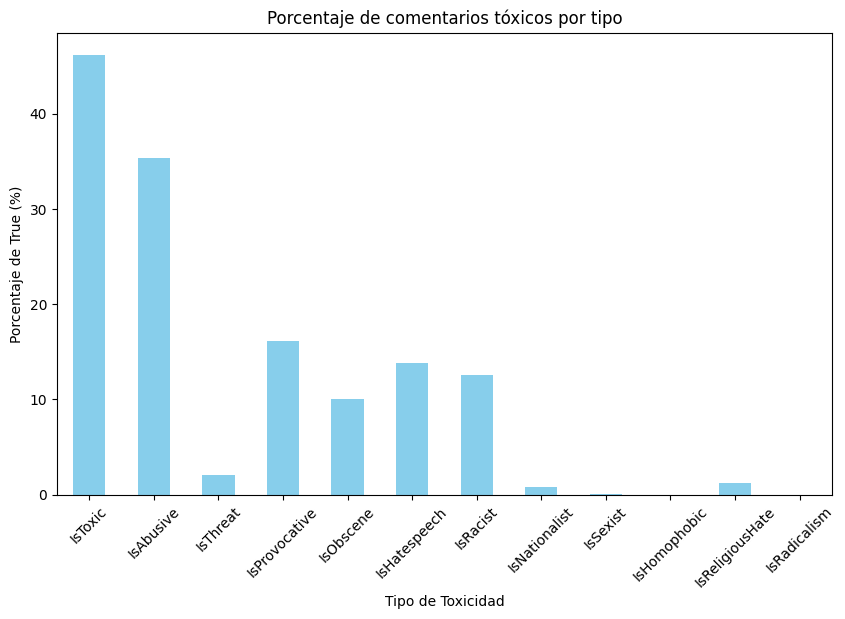

In [7]:
import matplotlib.pyplot as plt

# List of bool columns
bool_columns = [
    'IsToxic', 'IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene',
    'IsHatespeech', 'IsRacist', 'IsNationalist', 'IsSexist', 
    'IsHomophobic', 'IsReligiousHate', 'IsRadicalism'
]

# Calcular el porcentaje de True en cada columna booleana
bool_percentages = (df[bool_columns].sum() / len(df)) * 100

# Visualizar los porcentajes como un gráfico de barras
plt.figure(figsize=(10, 6))
bool_percentages.plot(kind='bar', color='skyblue')
plt.title('Porcentaje de comentarios tóxicos por tipo')
plt.xlabel('Tipo de Toxicidad')
plt.ylabel('Porcentaje de True (%)')
plt.xticks(rotation=45)
plt.show()

Podemos observar que dos variables son las que tienen la gran mayoría de peso, que son IsToxic y IsAbusive. Donde IsToxic tiene mas de un 45%.

Tras analizar esta gráfica, vamos a analizar más en profundidad la variable IsToxic, para ver posibles patrones con el resto, y analizar si podría tratarse de una variable que combine y sea el resultado de las demás.

In [8]:
# Define toxic columns (excluding IsToxic)
toxic_columns = ['IsAbusive', 'IsThreat', 'IsProvocative', 'IsObscene', 'IsHatespeech', 'IsRacist', 'IsNationalist', 'IsSexist', 'IsHomophobic', 'IsReligiousHate', 'IsRadicalism']

In [9]:
# Calculate the sum of toxic columns
df['ToxicSum'] = df[toxic_columns].sum(axis=1)

In [10]:
# Create a new column 'NewIsToxic' based on ToxicSum
df['NewIsToxic'] = (df['ToxicSum'] > 0).astype(int)

In [11]:
# Compare NewIsToxic with original IsToxic
df['Matches'] = (df['NewIsToxic'] == df['IsToxic']).astype(int)

In [12]:
# Calculate correct predictions
true_positives = ((df['IsToxic'] == 1) & (df['NewIsToxic'] == 1)).sum()
true_negatives = ((df['IsToxic'] == 0) & (df['NewIsToxic'] == 0)).sum()
false_positives = ((df['IsToxic'] == 0) & (df['NewIsToxic'] == 1)).sum()
false_negatives = ((df['IsToxic'] == 1) & (df['NewIsToxic'] == 0)).sum()

print(f"Correct predictions for True (True Positives): {true_positives}")
print(f"Correct predictions for False (True Negatives): {true_negatives}")
print(f"Incorrect predictions (False Positives): {false_positives}")
print(f"Incorrect predictions (False Negatives): {false_negatives}")
print(f"Total correct predictions: {true_positives + true_negatives}")
print(f"Accuracy: {(true_positives + true_negatives) / len(df):.2%}")

Correct predictions for True (True Positives): 462
Correct predictions for False (True Negatives): 538
Incorrect predictions (False Positives): 0
Incorrect predictions (False Negatives): 0
Total correct predictions: 1000
Accuracy: 100.00%


In [13]:
# Save the updated dataframe to a new CSV file
output_path = os.path.join(os.path.dirname(data_path), 'compare_toxic.csv')

df.to_csv(output_path, index=False)

print(f"Updated dataset saved to '{output_path}'")

Updated dataset saved to 'c:\Users\WINDOWS\Desktop\Bootcamp_IA\Proyecto_NLP\Grupo6_NLP\notebook\..\data\compare_toxic.csv'


Con esto podemos observar que si en las 'toxic_columns' hay 1 o más variables que sean True, el resultado de IsToxic va a ser True, por lo tanto, en vez de entranar al modelo con una multiclase, elegiremos entrenarlo solo con la variable que engloba a todas, es decir la variable IsToxic. 